## Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [4]:
df=pd.read_csv('hotel_booking.csv')

In [22]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


## EDA and Data Cleaning 

In [16]:
#no need of customer personal information
df.drop(['name','email','phone-number','credit_card'],axis=1,inplace=True)

In [17]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [25]:
df.shape

(119390, 32)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
#change the datatype of reservation_status_date from object to datetime 
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [8]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,48,6,1,28


In [35]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [6]:
df.describe(include='object').columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [5]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [27]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [19]:
#It will be difficult to handle the missing values of agent col. and company col.
#thatswhy delete both the col. 
#Drop rows of other columns having null values
df.drop(['agent','company'],axis=1,inplace=True)
df.dropna(inplace=True)

In [20]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [8]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


<AxesSubplot:>

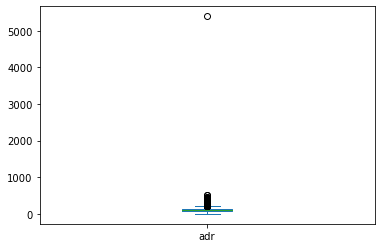

In [30]:
# There are many outliers in this dataset like no. of children or no. of babies as its 75%ile is 0 but max is 10...
#but it is not a use for us...remove outliers of adr(avg. daily rate) as 5400 is very high
df['adr'].plot(kind='box')

In [31]:
df = df[df['adr']<5000]
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


## Data Analysis and Visualizations

In [21]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [22]:
Canceled_data = df[df['is_canceled']==1]
Canceled_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,A,0,No Deposit,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,D,0,No Deposit,0,Transient,105.5,0,0,Canceled,2015-04-22
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,E,0,No Deposit,0,Transient,123.0,0,0,Canceled,2015-06-23
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,...,E,0,No Deposit,0,Transient,107.0,0,2,Canceled,2015-05-11
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,...,E,0,No Deposit,0,Transient,108.3,0,2,Canceled,2015-05-29


In [23]:
Non_Canceled_data = df[df['is_canceled']==0]
Non_Canceled_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [33]:
df['is_canceled'].value_counts()

0    74745
1    44152
Name: is_canceled, dtype: int64

In [34]:
cancelled_perc = df['is_canceled'].value_counts(normalize=True)
print(cancelled_perc)

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64


* Around 37% of the total reservations are canceled

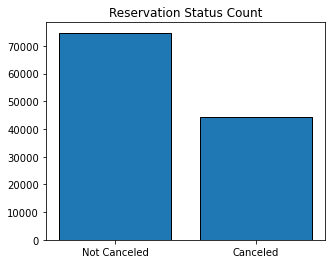

In [25]:
plt.figure(figsize=(5,4))
plt.title('Reservation Status Count')
plt.bar(['Not Canceled','Canceled'],df['is_canceled'].value_counts(),edgecolor='k')
plt.show()

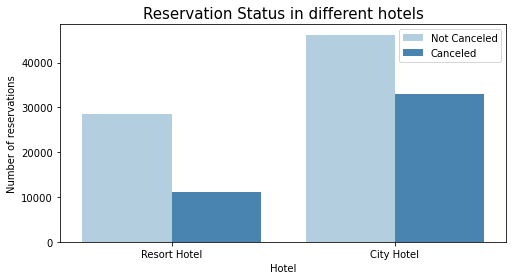

In [104]:
#Cancelation rate depending upon hotels
plt.figure(figsize = (8,4))
sns.countplot(x='hotel', hue='is_canceled', data=df, palette='Blues' )
plt.title('Reservation Status in different hotels',size=15)
plt.xlabel('Hotel')
plt.ylabel('Number of reservations')
plt.legend(labels = ['Not Canceled', 'Canceled'])

In [106]:
City_hotel = df[df['hotel']=='City Hotel']
City_hotel['is_canceled'].value_counts(normalize=True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

* Around 41% of the total reservations in City hotels are canceled (Which is very high)

In [107]:
Resort_hotel = df[df['hotel']=='Resort Hotel']
Resort_hotel['is_canceled'].value_counts(normalize=True) 

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [111]:
#Effect of price in cancelation of hotels
City = City_hotel.groupby('reservation_status_date').mean()[['adr']]
print(City.head())
Resort = Resort_hotel.groupby('reservation_status_date').mean()[['adr']]
print(Resort.head())

                               adr
reservation_status_date           
2014-10-17               62.800000
2015-01-01               62.063158
2015-01-20               76.500000
2015-01-30               61.400000
2015-02-17               76.500000
                               adr
reservation_status_date           
2014-11-18                0.000000
2015-01-01               61.966667
2015-01-02                9.633750
2015-01-18                0.000000
2015-01-21               37.301209


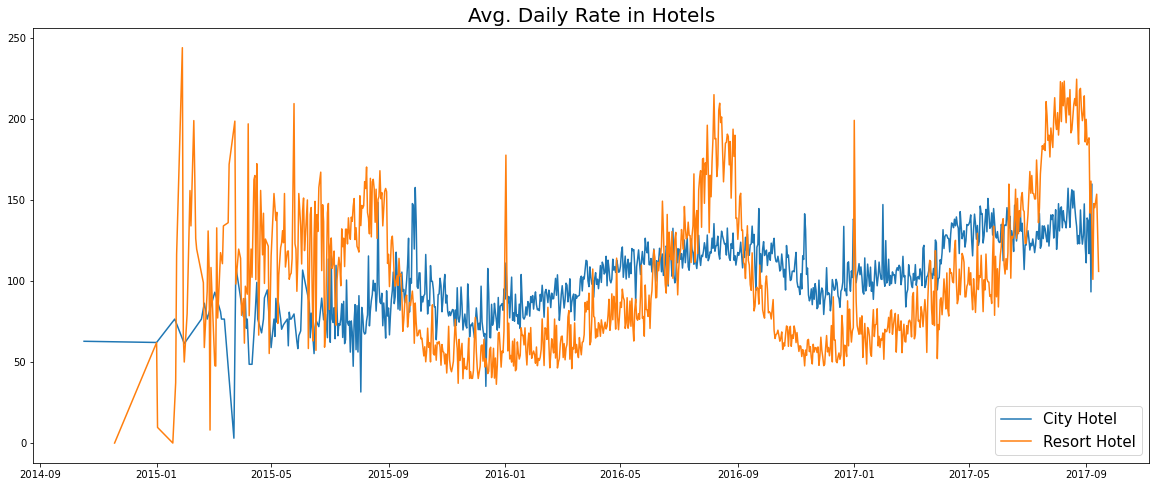

In [114]:
plt.figure(figsize=(20,8))
plt.title('Avg. Daily Rate in Hotels', fontsize=20)
plt.plot(City.index, City['adr'], label = 'City Hotel')
plt.plot(Resort.index, Resort['adr'], label = 'Resort Hotel')
plt.legend(fontsize = 15)
plt.show()

In [43]:
df[(df['hotel']=='Resort Hotel') & (df['is_canceled']==1)].groupby('reservation_status_date').mean()[['adr']]

,adr
reservation_status_date,
2014-11-18,0.000000
2015-01-01,61.966667
2015-01-02,9.633750
2015-01-18,0.000000
2015-01-21,37.301209
...,...
2017-08-25,228.250000
2017-08-26,234.250000
2017-08-27,131.400000


In [47]:
Resort_cancel = df[(df['hotel']=='Resort Hotel') & (df['is_canceled']==1) & (df['reservation_status_date']>'2015-07')].groupby('reservation_status_date').mean()[['adr']]
Resort_not_cancel = df[(df['hotel']=='Resort Hotel') & (df['is_canceled']==0) & (df['reservation_status_date']>'2015-07')].groupby('reservation_status_date').mean()[['adr']]

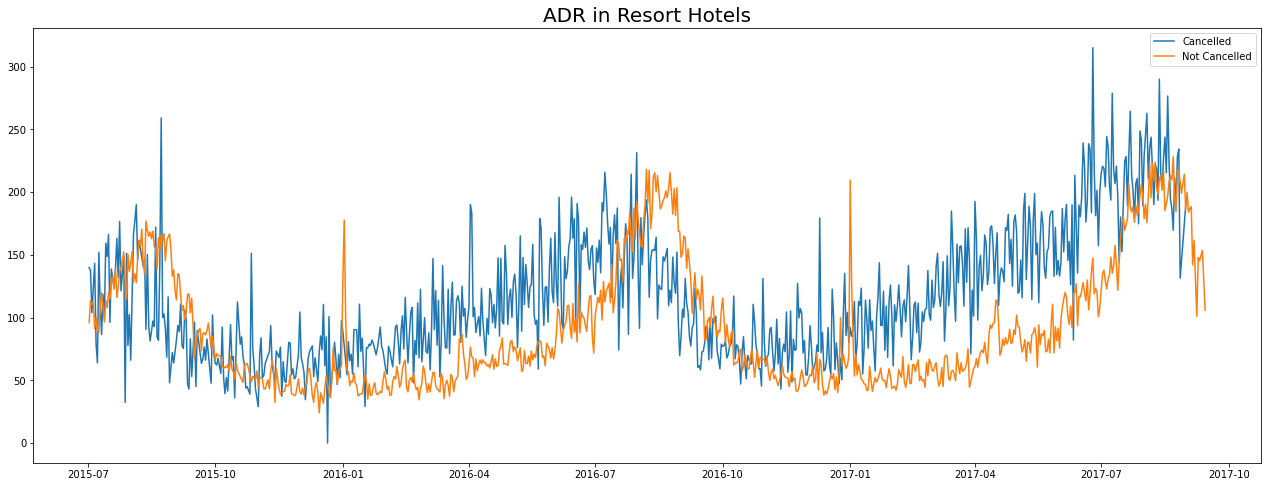

In [55]:
plt.figure(figsize=(22,8))
plt.title('ADR in Resort Hotels', fontsize=20)
plt.plot(Resort_cancel.index,Resort_cancel['adr'],label = 'Cancelled')
plt.plot(Resort_not_cancel.index,Resort_not_cancel['adr'],label = 'Not Cancelled')
plt.legend()
plt.show()

* From this we see Avg. Daily Rate impact in cancellation of resort hotels.

In [54]:
City_cancel = df[(df['hotel']=='City Hotel') & (df['is_canceled']==1) & (df['reservation_status_date']>'2015-07')].groupby('reservation_status_date').mean()[['adr']]
City_not_cancel = df[(df['hotel']=='City Hotel') & (df['is_canceled']==0) & (df['reservation_status_date']>'2015-07')].groupby('reservation_status_date').mean()[['adr']]

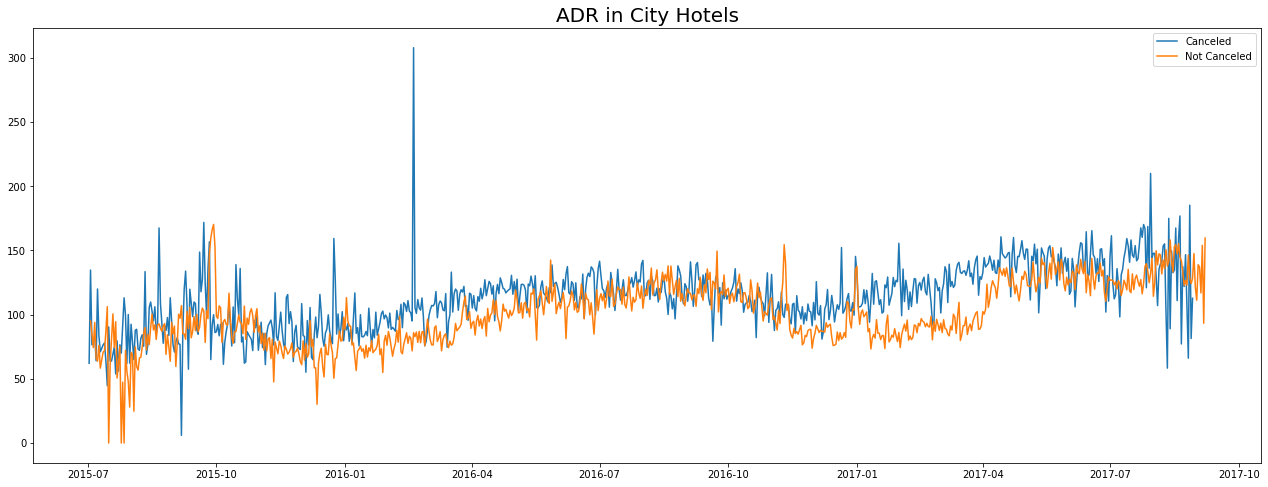

In [62]:
plt.figure(figsize=(22,8))
plt.title('ADR in City Hotels', fontsize=20)
plt.plot(City_cancel.index,City_cancel['adr'],label = 'Canceled')
plt.plot(City_not_cancel.index,City_not_cancel['adr'],label = 'Not Canceled')
plt.legend()
plt.show()

* Avg. Daily Rate does not have significant impact in cancellation of city hotels.

In [57]:
#Reservations on the basis of months
df['month']  = df['reservation_status_date'].dt.month
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,7


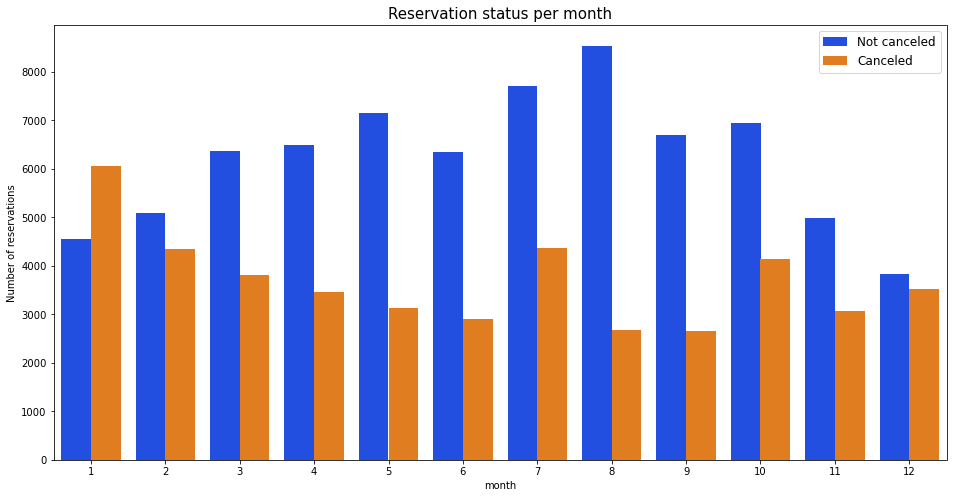

In [58]:
plt.figure(figsize = (16,8))
sns.countplot(x = 'month', hue = 'is_canceled', data = df, palette = 'bright')
plt.title('Reservation status per month', fontsize = 15)
plt.xlabel('month')
plt.ylabel('Number of reservations')
plt.legend(['Not canceled','Canceled'], fontsize = 12)
plt.show()

In [63]:
#Cancellation is highest in the month of january let's see the adr per month
Canceled = df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index()
Canceled

,month,adr
0,1,571203.57
1,2,453075.76
2,3,424872.56
3,4,425315.23
4,5,391438.08
5,6,359003.34
6,7,481376.17
7,8,325668.43
8,9,274176.33
9,10,330968.87


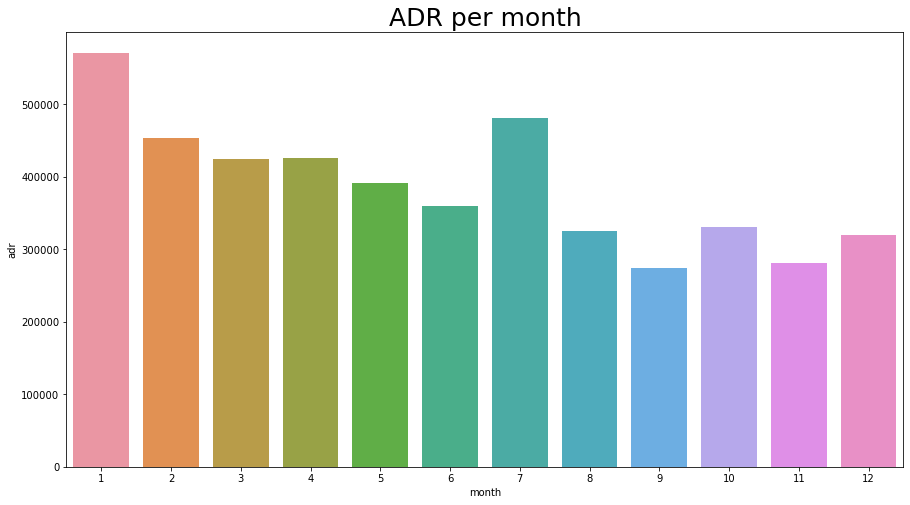

In [60]:
plt.figure(figsize = (15,8))
sns.barplot(x = 'month', y = 'adr', data = Cancelled)
plt.title('ADR per month', fontsize = 25)
plt.show()

* Therefore cancellation in jan and july is highest and the ADR of both the months is also high.

In [152]:
# Cancellations on the basis of countries
df['country'].unique()

177

In [45]:
Country = Canceled_data.groupby('country').sum()           
Country.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,day
country,,,,,,,,,,,,,,,,,,,
AGO,205,7209,413347,4205,3303,672,1644,311,57.0,0,2,2,3,33,0,24805.61,0,70,413328
ALB,2,45,4032,42,30,3,5,4,0.0,0,0,0,0,0,0,222.00,0,0,4032
AND,5,291,10083,114,77,6,16,10,2.0,0,0,0,0,1,0,828.57,0,3,10083
ARE,43,2407,86704,1006,773,64,150,79,20.0,0,0,0,0,2,0,5900.48,0,20,86703
ARG,54,4674,108890,1184,752,53,142,110,17.0,0,0,0,0,5,0,6980.66,0,21,108883


In [46]:
Country.sort_values(by='is_canceled', ascending=False).head(10)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,day
country,,,,,,,,,,,,,,,,,,,
PRT,27514,4575689,55468178,769021,431759,22630,66154,50777,1463.0,115,526,8204,1045,1671,157497,2563165.33,0,5547,55461921
GBR,2453,322310,4946467,64271,39268,2638,7273,4843,463.0,4,1,118,3,328,0,289285.07,0,1326,4946106
ESP,2177,186626,4389571,61573,34872,1962,5372,4416,508.0,16,6,36,6,361,0,297461.70,0,1261,4389438
FRA,1934,199398,3899891,49944,30421,1991,5241,3938,333.0,9,6,3,9,303,0,244793.10,0,1093,3899692
ITA,1333,146203,2687749,35424,20540,1335,3250,2776,184.0,2,2,2,3,178,77,159649.57,0,585,2687593
DEU,1218,155427,2456119,32112,19950,1252,3381,2406,130.0,3,0,2,0,196,0,146196.99,0,612,2455927
IRL,832,121066,1677695,23115,11372,1094,2876,1675,131.0,1,2,618,2,195,0,90599.38,0,483,1677586
BRA,830,99829,1673719,19897,13548,1037,2304,1687,173.0,7,0,2,0,143,0,96878.05,0,531,1673548
USA,501,49022,1010302,13357,7511,497,1105,978,128.0,0,1,0,2,125,0,68027.99,0,276,1010262


In [66]:
top_country = Canceled_data['country'].value_counts().head(10)
top_country

PRT    27515
GBR     2453
ESP     2177
FRA     1934
ITA     1333
DEU     1218
IRL      832
BRA      830
USA      501
BEL      474
Name: country, dtype: int64

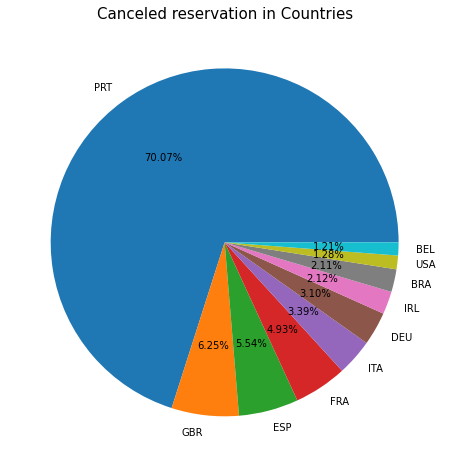

In [67]:
plt.figure(figsize = (8,8))
plt.title('Canceled reservation in Countries', fontsize = 15)
plt.pie(top_country,labels = top_country.index, autopct = '%0.2f%%')
plt.show()

* Cancellation rate is highest in Portugal i.e. more than 70%

In [26]:
#Reservations on the basis of market segment
df['market_segment'].value_counts(normalize=True)

Online TA        0.473046
Offline TA/TO    0.202856
Groups           0.165935
Direct           0.105587
Corporate        0.044350
Complementary    0.006223
Aviation         0.001985
Undefined        0.000017
Name: market_segment, dtype: float64

In [49]:
Canceled_data['market_segment'].value_counts(normalize=True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

In [71]:
Canceled_adr = Canceled_data.groupby('reservation_status_date').mean()[['adr']].reset_index()
print(Canceled_adr)
Non_Canceled_adr = Non_Canceled_data.groupby('reservation_status_date').mean()[['adr']].reset_index()
print(Non_Canceled_adr)

    reservation_status_date         adr
0                2014-10-17   62.800000
1                2014-11-18    0.000000
2                2015-01-01   62.062779
3                2015-01-02    9.633750
4                2015-01-18    0.000000
..                      ...         ...
897              2017-08-26  178.200000
898              2017-08-27  167.300000
899              2017-08-28   81.416667
900              2017-08-29  144.253333
901              2017-08-31  189.750000

[902 rows x 2 columns]
    reservation_status_date         adr
0                2015-07-01   31.650000
1                2015-07-02   95.924000
2                2015-07-03   97.645205
3                2015-07-04  110.480000
4                2015-07-05  100.308485
..                      ...         ...
800              2017-09-08  101.012500
801              2017-09-09  147.778333
802              2017-09-10  145.272500
803              2017-09-12  153.570000
804              2017-09-14  105.930000

[805 rows x 2 c

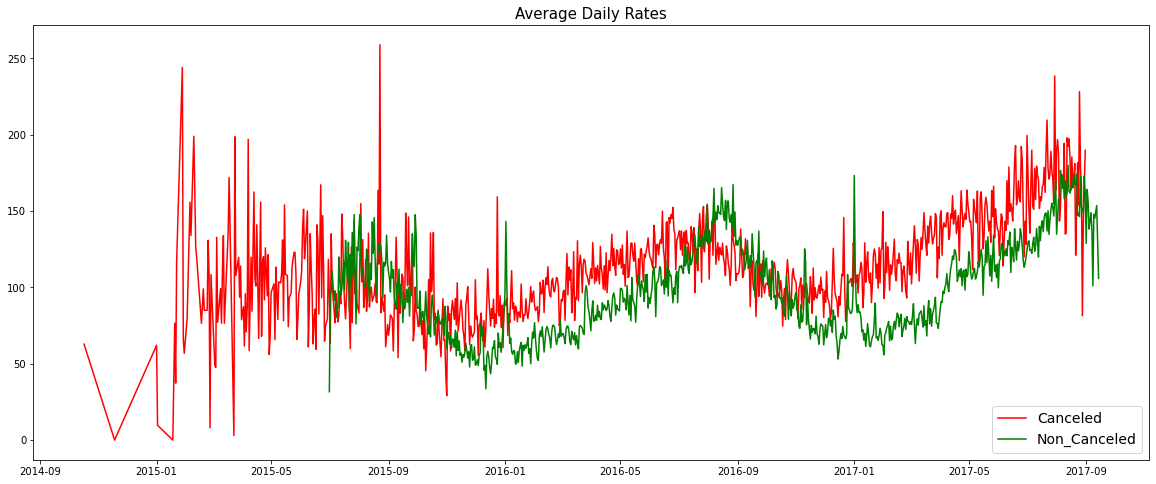

In [72]:
plt.figure(figsize=(20,8))
plt.title('Average Daily Rates', fontsize = 15)
plt.plot(Canceled_adr['reservation_status_date'], Canceled_adr['adr'], label='Canceled', color='r')
plt.plot(Non_Canceled_adr['reservation_status_date'],Non_Canceled_adr['adr'],label='Non_Canceled', color='g')
plt.legend(fontsize=14)
plt.show()

In [75]:
Canceled_adr = Canceled_adr[Canceled_adr['reservation_status_date']>'2016']
Non_Canceled_adr = Non_Canceled_adr[Non_Canceled_adr['reservation_status_date']>'2016']

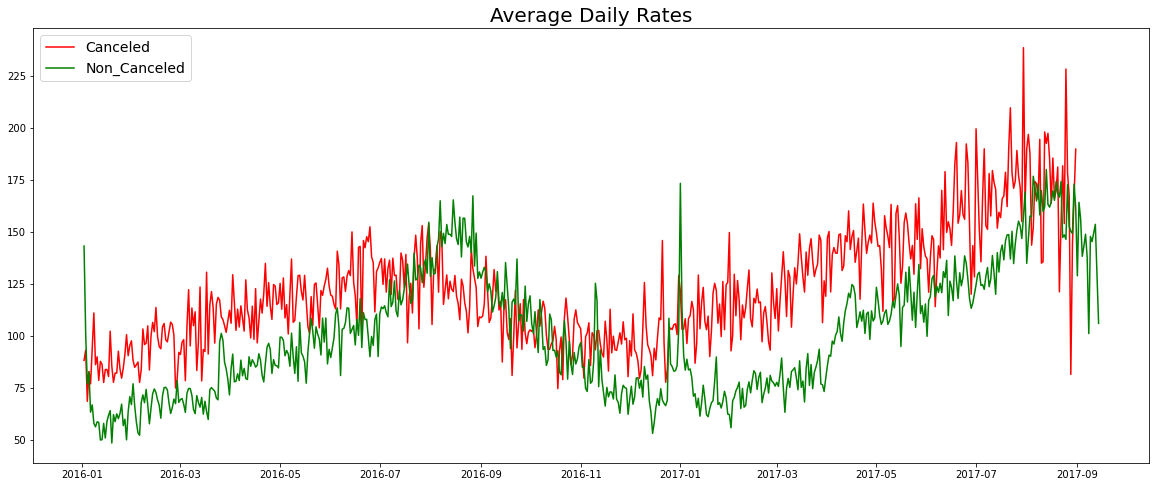

In [76]:
plt.figure(figsize = (20,8))
plt.title('Average Daily Rates', fontsize =20)
plt.plot(Canceled_adr['reservation_status_date'],Canceled_adr['adr'],label='Canceled',color='r')
plt.plot(Non_Canceled_adr['reservation_status_date'],Non_Canceled_adr['adr'],label='Non_Canceled', color='g')
plt.legend(fontsize=14)
plt.show()